In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
# import dataset
data = pd.read_csv("/content/delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# **EDA and Data visualization**

In [ ]:
data.shape

(21, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


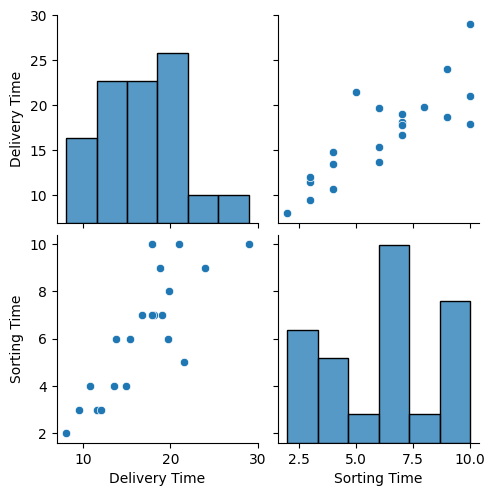

In [ ]:
sns.pairplot(data)

<ipython-input-165-fd8df65c5d1c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

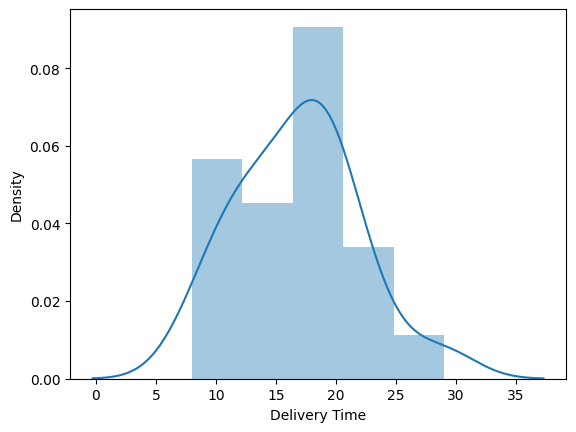

In [ ]:
sns.distplot(data['Delivery Time'])

<ipython-input-166-971e7a7bfcf0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

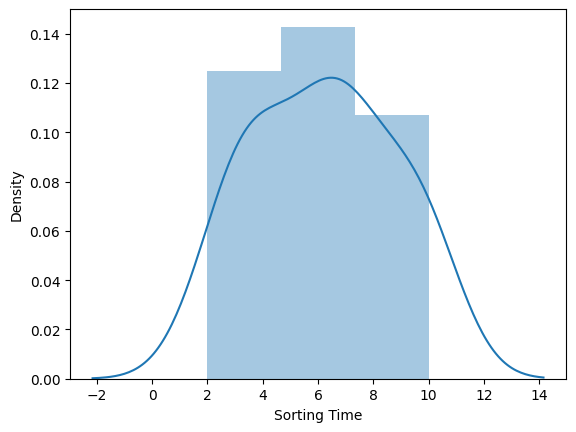

In [ ]:
sns.distplot(data['Sorting Time'])

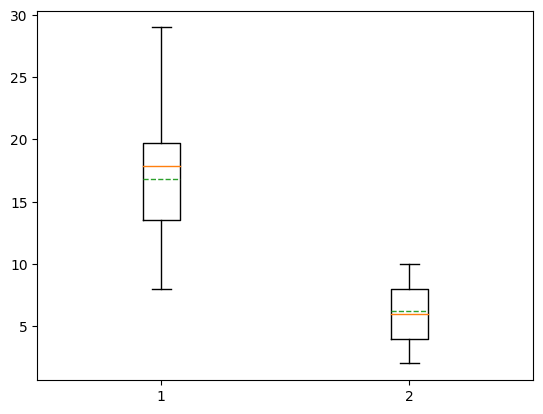

In [ ]:
plt.boxplot(data,meanline=True,showmeans=True)
plt.show()

# There is no outlier in the data. Sorting time is almost normally distributed because the mean value is almost same with the median value. But the left skewness is present in delivery time because mean value is less than median value.

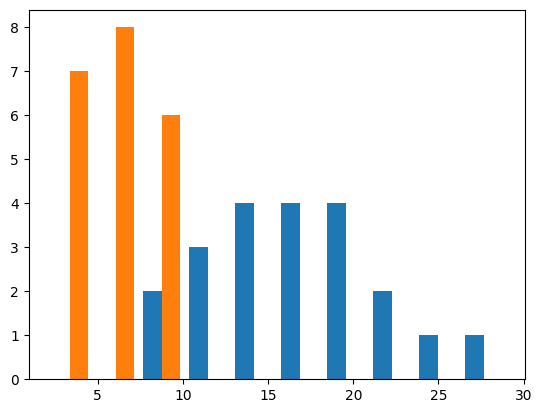

In [ ]:
plt.hist(data)
plt.show()

# Feature Engineering

In [ ]:
# Renaming Columns
data = data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Corelation Analysis

<Axes: >

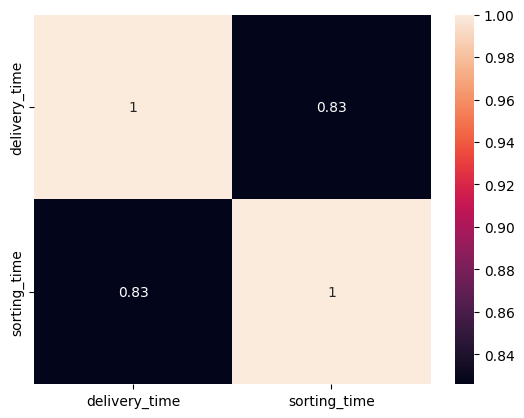

In [ ]:
sns.heatmap(data.corr(),annot=True)

# Co-relation percentage between delivery time and sorting time is 83%. So, there is high co-relation between them.

# Model Building

In [ ]:
model=smf.ols("delivery_time~sorting_time",data=data).fit()

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

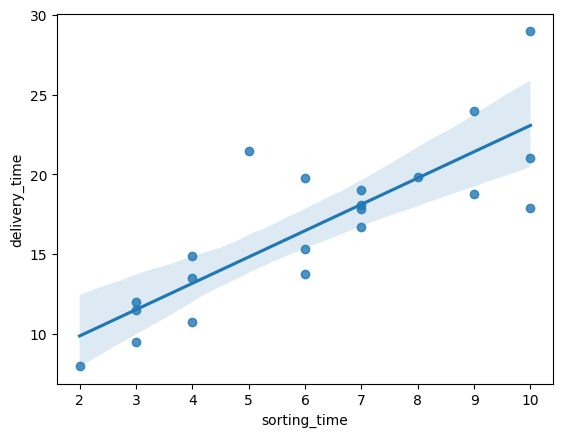

In [ ]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

# Model Testing

In [ ]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [ ]:
# Finding tvalues and pvalues
print(model.tvalues)
print(model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64
Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [ ]:
# Finding Rsquared Values
print(model.rsquared)
print(model.rsquared_adj)

0.6822714748417231
0.6655489208860244


# Exponential Transformation

In [ ]:
model_1=smf.ols("np.log(delivery_time)~sorting_time",data=data).fit()

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

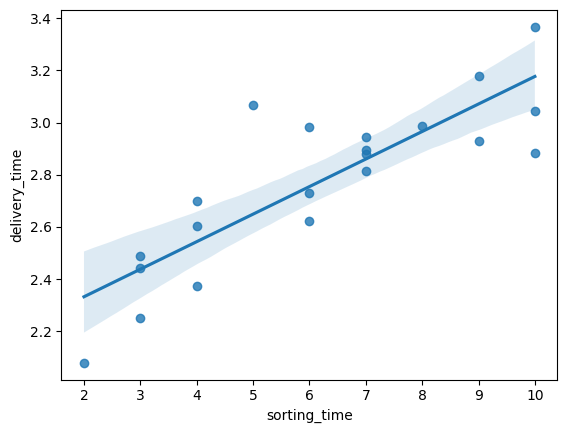

In [ ]:
sns.regplot(x=data['sorting_time'],y=np.log(data['delivery_time']))

In [ ]:
# Finding Coefficient parameters
model_1.params

Intercept       2.121372
sorting_time    0.105552
dtype: float64

In [ ]:
# Finding tvalues and pvalues
print(model_1.tvalues)
print(model_1.pvalues)

Intercept       20.601357
sorting_time     6.836088
dtype: float64
Intercept       1.857343e-14
sorting_time    1.592708e-06
dtype: float64


In [ ]:
# Finding Rsquared Values
print(model_1.rsquared)
print(model_1.rsquared_adj)

0.7109478980584187
0.6957346295351776


# Tranforming independent variable (Logarithm Transformation)

In [ ]:
model_2=smf.ols("delivery_time~np.log(sorting_time)",data=data).fit()

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

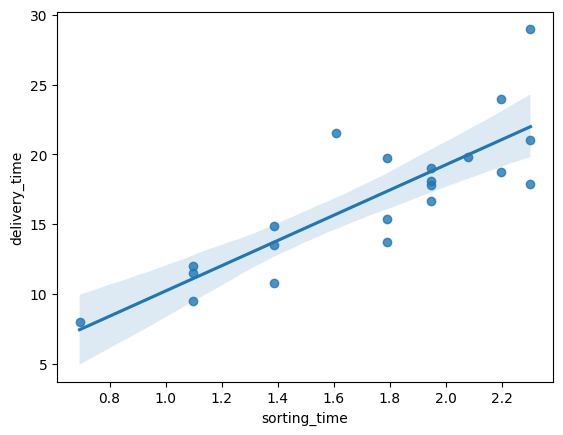

In [ ]:
sns.regplot(x=np.log(data['sorting_time']),y=data['delivery_time'])

In [ ]:
# Finding Coefficient parameters
model_2.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [ ]:
# Finding tvalues and pvalues
print(model_2.tvalues)
print(model_2.pvalues)

Intercept               0.472460
np.log(sorting_time)    6.586789
dtype: float64
Intercept               0.641980
np.log(sorting_time)    0.000003
dtype: float64


In [ ]:
# Finding Rsquared Values
print(model_2.rsquared)
print(model_2.rsquared_adj)

0.6954434611324223
0.6794141696130761


# Transform both independent and dependent variables (Log-Log Transformation)

In [ ]:
model_3=smf.ols("np.log(delivery_time)~np.log(sorting_time)",data=data).fit()

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

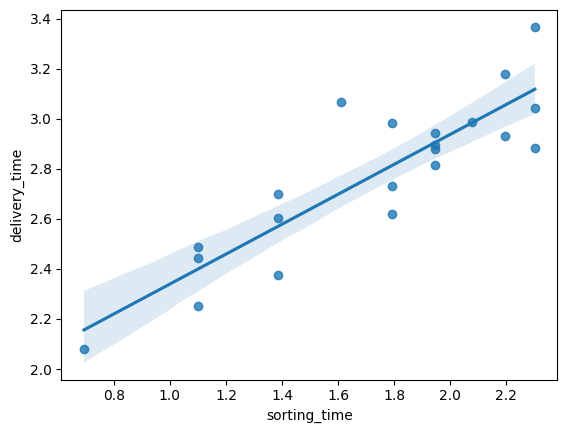

In [ ]:
sns.regplot(x=np.log(data['sorting_time']),y=np.log(data['delivery_time']))

In [ ]:
# Finding Coefficient parameters
model_3.params

Intercept               1.741987
np.log(sorting_time)    0.597522
dtype: float64

In [ ]:
# Finding tvalues and pvalues
print(model_3.tvalues)
print(model_3.pvalues)

Intercept               13.085552
np.log(sorting_time)     8.024484
dtype: float64
Intercept               5.921137e-11
np.log(sorting_time)    1.601539e-07
dtype: float64


In [ ]:
# Finding Rsquared Values
print(model_3.rsquared)
print(model_3.rsquared_adj)

0.77216134926874
0.7601698413355158


# Checking accuracy

In [ ]:
Table=pd.DataFrame({'Prep_Models':['model(SLR)','model_1(Exp)','model_2(Logarithm)','model_3(Log-Log)'],'Rsquared':[model.rsquared,model_1.rsquared,model_2.rsquared,model_3.rsquared],'Rsquared_Adj':[model.rsquared_adj,model_1.rsquared_adj,model_2.rsquared_adj,model_3.rsquared_adj]})
Table

,Prep_Models,Rsquared,Rsquared_Adj
0,model(SLR),0.682271,0.665549
1,model_1(Exp),0.710948,0.695735
2,model_2(Logarithm),0.695443,0.679414
3,model_3(Log-Log),0.772161,0.760170


# So, we will consider the model having highest R-squared value which is the Log-Log transformation and the model is model_3

# Model Prediction


In [ ]:
# Manual prediction for say sorting time 6
delivery_time = (1.741987) + (0.597522)*(np.log(6))
np.exp(delivery_time)

16.653205186140255

In [ ]:
# Automatic Prediction for say sorting time 6
new_data=pd.DataFrame({'sorting_time':6},index=[0])
new_data

,sorting_time
0,6


In [ ]:
np.exp(model_3.predict(new_data))

0    16.653216
dtype: float64

# Getting residual

In [ ]:
residuals = model_3.resid
residuals

0    -0.073311
1     0.032361
2     0.170550
3     0.123176
4     0.249463
5    -0.081488
6     0.039727
7    -0.147141
8    -0.233032
9    -0.123684
10    0.002696
11   -0.195423
12   -0.090501
13    0.043915
14    0.088971
15    0.129689
16   -0.191565
17   -0.008248
18   -0.076716
19   -0.023829
20    0.364391
dtype: float64

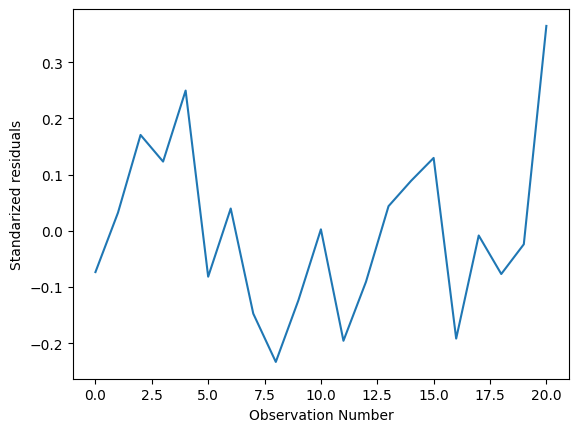

In [ ]:
plt.plot(residuals)
plt.xlabel('Observation Number')
plt.ylabel('Standarized residuals')
plt.show()